# Etape 1

In [2]:
import pandas as pd
data = pd.read_csv("data/train.csv")

# Etape 2

In [3]:
data.columns = [x.lower() for x in data.columns]
titanic_df = data.set_index(data['passengerid'])
titanic_df = titanic_df.drop(['passengerid', 'ticket', 'name'], axis = 1)
titanic_df = titanic_df.dropna(axis = 0, subset = ["age","sex", "embarked"])
titanic_df
 

,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked
passengerid,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,3,female,39.0,0,5,29.1250,NaN,Q
887,0,2,male,27.0,0,0,13.0000,NaN,S
888,1,1,female,19.0,0,0,30.0000,B42,S


<AxesSubplot: xlabel='fare', ylabel='Density'>

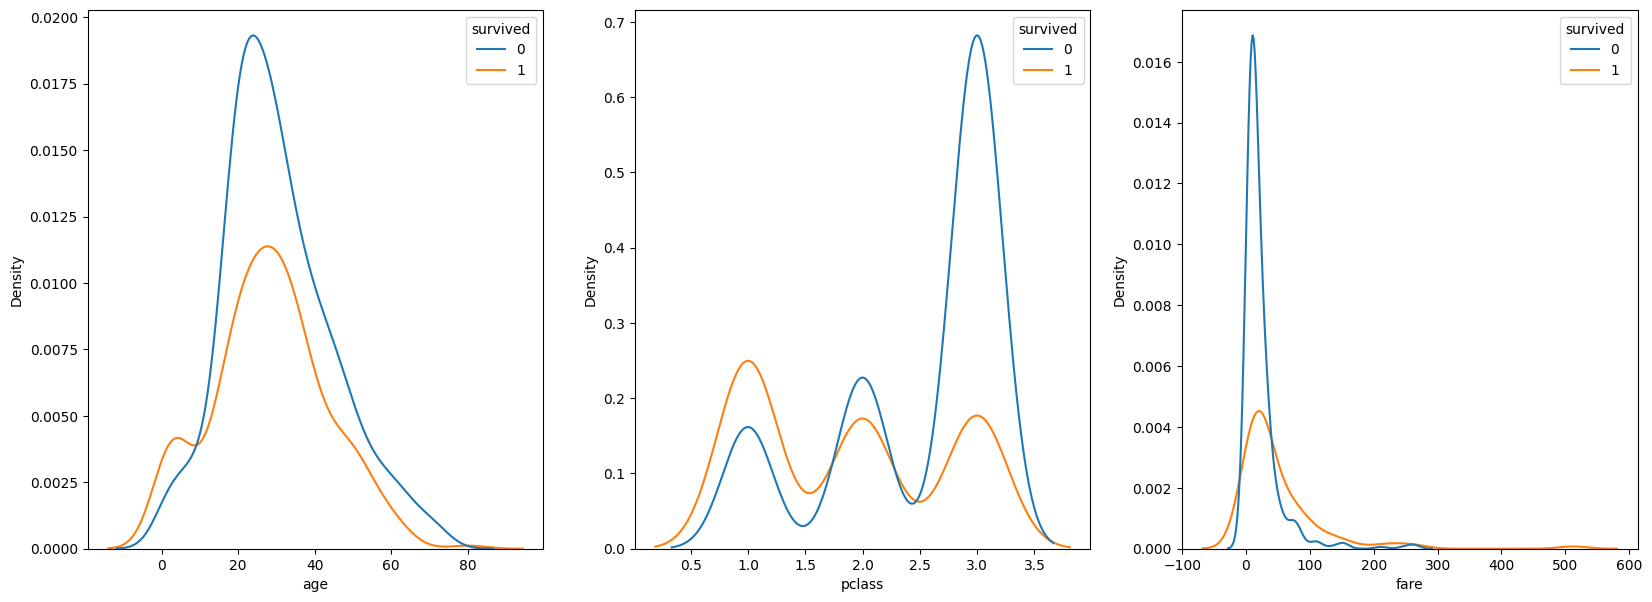

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig1, axes = plt.subplots(1,3, figsize=(20, 7))
 
sns.kdeplot(data = titanic_df, x = "age" , hue ='survived', ax = axes[0])
sns.kdeplot(data = titanic_df, x = "pclass", hue = 'survived', ax = axes[1])
sns.kdeplot(data = titanic_df, x = "fare", hue = 'survived', ax = axes[2])

On regarde les densités du nombre de survivant par rapport à : l'age, la classe, et le prix du billet. 
Pour l'âge, on observe que les moyennes d'age des personnes en vie et  mortes sont très proches, mais on voit aussi que les personnes mineurs ont plus de chance d'être sauve que les majeurs. 

Pour ce qui est des classes : on remarque que les personnes en 3e classe sont beaucoup plus nombreuses mais on un taux de survie très faible. Pour la seconde classe : les 2 courbe son un peu plus équilibrer mais le nombre d'occupant dans cette catégorie es bien plus faible que laprécédente. Et enfin en premiere classe : ils sont encore moins nombreux mais leur chance de survie est bien meilleure; 

Et enfin pour le prix du billet : on remarque que la plupart des gens ont acheté leur billet très peu cher mais c'est également eux qui sont mort en nomnre. Au contraire, on voit que ceux qui ont acheté leur billet très cher, sont ceux qui ont survécus.

In [5]:
def mineur(row):
    if row['age'] >= 18:
        return 'adult'
    elif row['age'] < 18:
        return 'minor'
    else :
        return 'unknown'

titanic_df['label_age'] = titanic_df.apply(mineur, axis = 1)

<AxesSubplot: xlabel='embarked', ylabel='survived'>

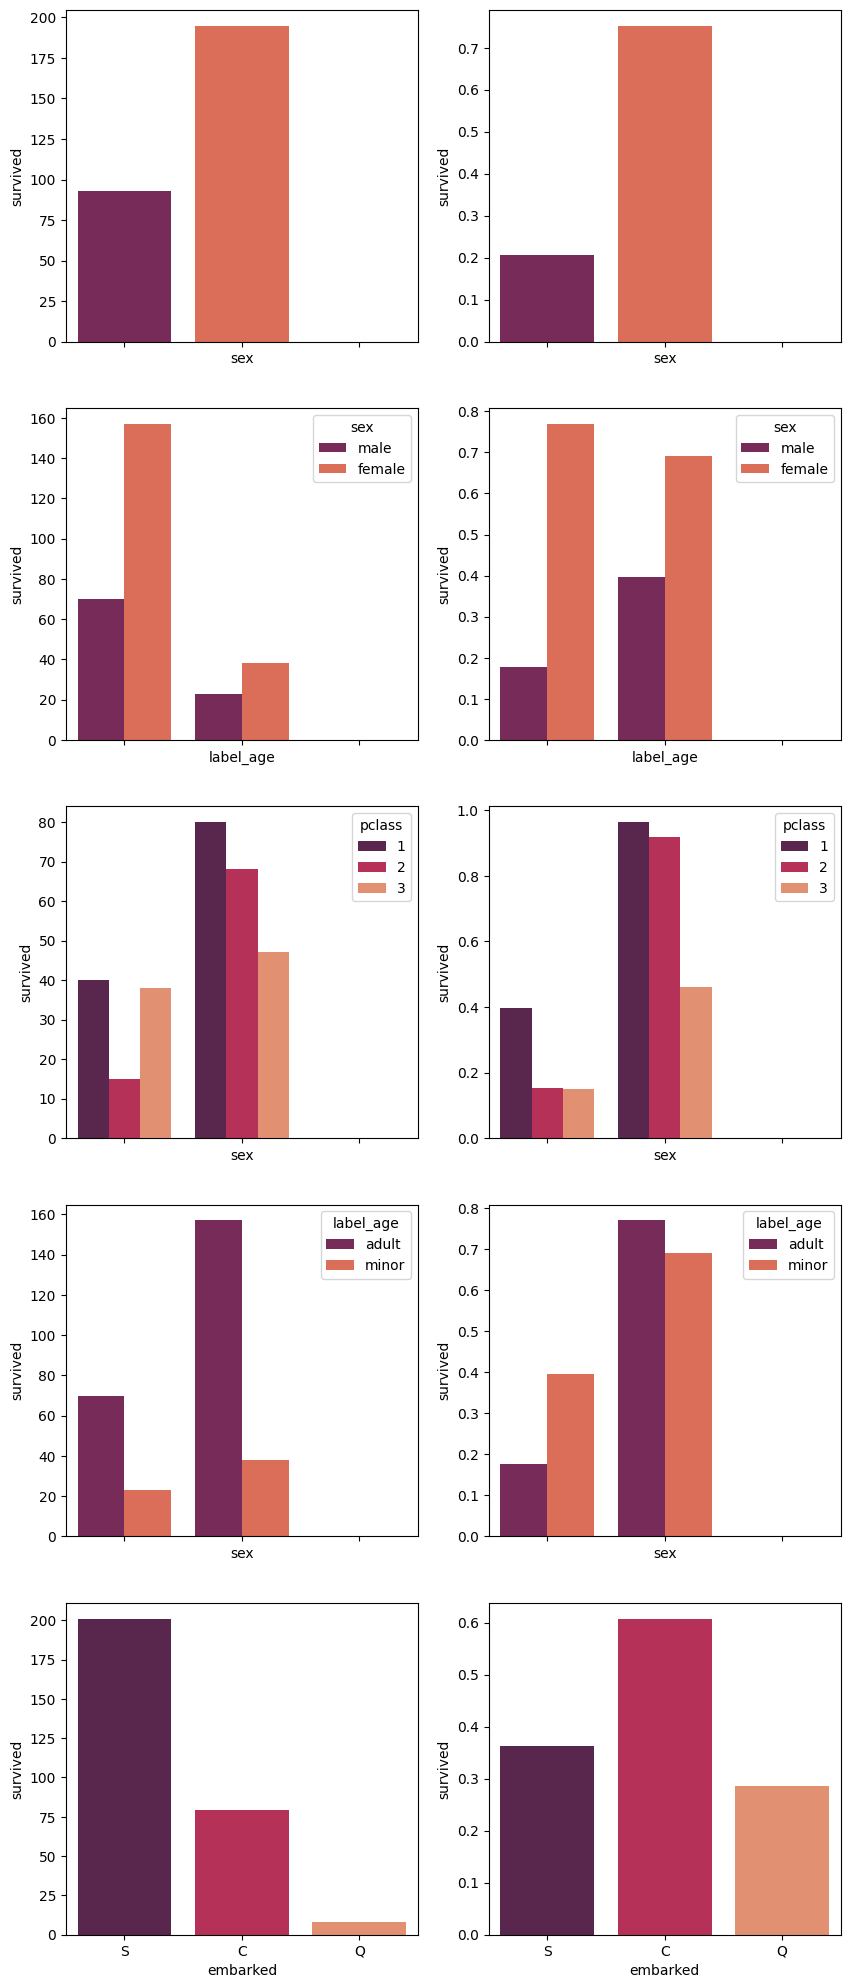

In [6]:
fig, axes = plt.subplots(5,2, sharex=True, figsize=(10,25))

# survivants par sexe (représentation de l'effectif et proportion (pour chaque paire de graph))
sns.barplot(data = titanic_df, x = 'sex', y = 'survived', palette= "rocket", ax = axes[0,0], errorbar = None, estimator = sum)
sns.barplot(data = titanic_df, x = 'sex', y = 'survived', palette= "rocket", ax = axes[0,1], errorbar = None)

# survivants par sexe et ages
sns.barplot(data = titanic_df, x = 'label_age', y = 'survived', hue = 'sex', palette= "rocket", ax = axes[1,0], errorbar = None, estimator = sum)
sns.barplot(data = titanic_df, x = 'label_age', y = 'survived', hue = 'sex', palette= "rocket", ax = axes[1,1], errorbar = None)


# survivants par sexe et classe
sns.barplot(data = titanic_df, x = 'sex', y = 'survived', hue = 'pclass', palette= "rocket", ax =  axes[2,0], errorbar = None, estimator = sum)
sns.barplot(data = titanic_df, x = 'sex', y = 'survived', hue = 'pclass', palette= "rocket", ax =  axes[2,1], errorbar = None)

# survivants par sexe et label_age
sns.barplot(data = titanic_df, x = 'sex', y = 'survived', hue = 'label_age', palette= "rocket", ax =  axes[3,0], errorbar = None, estimator = sum)
sns.barplot(data = titanic_df, x = 'sex', y = 'survived', hue = 'label_age', palette= "rocket", ax =  axes[3,1], errorbar = None)

# survivants par embarquement 
sns.barplot (data = titanic_df, x = 'embarked', y = 'survived', palette = 'rocket', ax = axes[4,0], errorbar = None, estimator = sum)
sns.barplot (data = titanic_df, x = 'embarked', y = 'survived', palette = 'rocket', ax = axes[4,1], errorbar = None)

# Etape 3

Utilisation d'un algorithme de classification : svm.SVC()

# Etape 4 

In [7]:
titanic_algo = titanic_df.copy()

def embarquement(row):
    if row['embarked'] == 'S':
        return 1
    elif row['embarked'] == 'C':
        return 2
    elif row['embarked'] == 'Q':
        return 3
    else :
        return 'unknown'

titanic_algo['embarked'] = titanic_algo.apply(embarquement, axis = 1)
titanic_algo.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked,label_age
passengerid,,,,,,,,,,
1,0,3,male,22.0,1,0,7.25,NaN,1,adult


In [8]:
def sex(row):
    if row['sex'] == 'female':
        return 1
    else:
        return 2

titanic_algo['sex'] = titanic_algo.apply(sex, axis = 1)
titanic_algo.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked,label_age
passengerid,,,,,,,,,,
1,0,3,2,22.0,1,0,7.25,NaN,1,adult


In [9]:
titanic_algo = titanic_algo.drop('cabin', axis = 1)
titanic_algo.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,label_age
passengerid,,,,,,,,,
1,0,3,2,22.0,1,0,7.25,1,adult


In [24]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC

# séparation de des données: 
features, target = titanic_algo.loc[:, ['pclass', 'embarked']], titanic_algo['survived']

# création de mes données d'entrainement et de test:
feat_train, feat_test, target_train, target_test = train_test_split(features, target)

# importation du modèle:
SVC_titanic = SVC()

# entrainement avec les données pour:
SVC_titanic.fit(feat_train, target_train)

# prédiction 
predict = SVC_titanic.predict(feat_test)


# Etape 5

              precision    recall  f1-score   support

           0       0.78      0.62      0.69       111
           1       0.53      0.70      0.60        67

    accuracy                           0.65       178
   macro avg       0.65      0.66      0.65       178
weighted avg       0.68      0.65      0.66       178



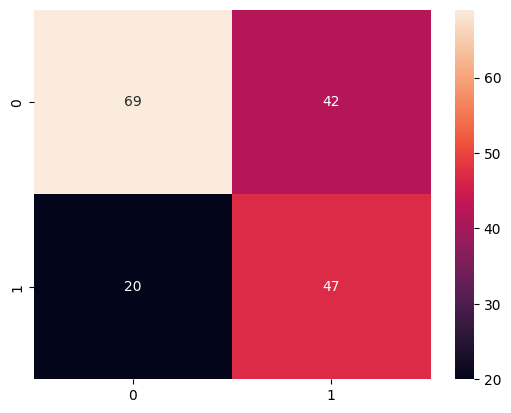

In [25]:
# calculs des metriques  
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report



#acc = accuracy_score(predict, target_test)
#precision1 = precision_score(target_test, predict, average=None) # % de prédictions justes
#recall1 = recall_score(target_test, predict, average=None) # indique la précision et la robustesse
#scoref1 = f1_score(target_test, predict, average=None)
matrix_svm = confusion_matrix(y_true=target_test, y_pred=predict)

sns.heatmap(matrix_svm, annot = True, fmt = "")

print(classification_report(target_test, predict))

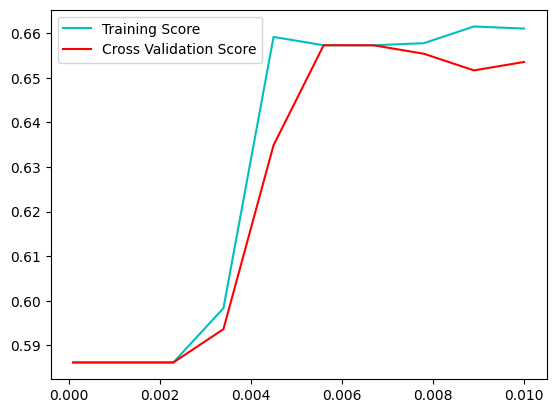

In [34]:

from sklearn.model_selection import validation_curve
import numpy as np

param_range = np.linspace(0.0001, 0.01, 10)

train_score, test_score = validation_curve(SVC_titanic, 
feat_train, 
target_train, 
param_name = "gamma", 
param_range = param_range)


plt.plot(param_range, np.mean(train_score, axis = 1), label = "Training Score", color = 'c')
plt.plot(param_range, np.mean(test_score, axis = 1), label = "Cross Validation Score", color = 'r')

plt.legend()
plt.show()



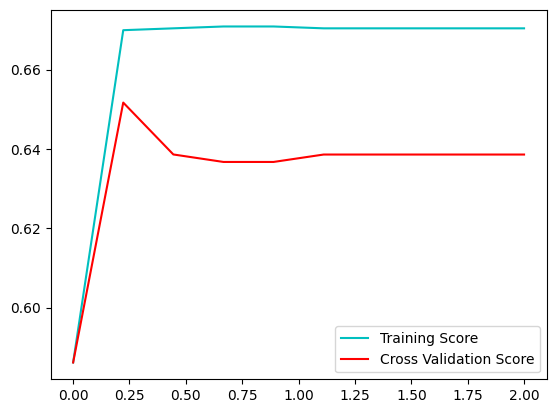

In [38]:
SVC_titanic = SVC(gamma = 0.2)

param_range = np.linspace(0.0001, 2, 10)

train_score, test_score = validation_curve(SVC_titanic, 
feat_train, 
target_train, 
param_name = "C", 
param_range = param_range)


plt.plot(param_range, np.mean(train_score, axis = 1), label = "Training Score", color = 'c')
plt.plot(param_range, np.mean(test_score, axis = 1), label = "Cross Validation Score", color = 'r')

plt.legend()
plt.show()

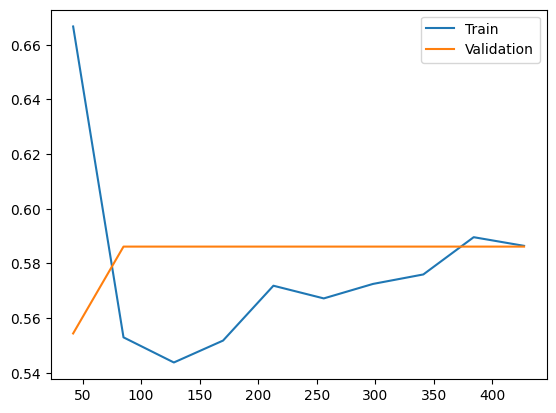

In [41]:
# learning curve 
import numpy as np
from sklearn.model_selection import learning_curve

SVC_titanic = SVC(gamma = 0.005, C = 0.25)

train_sizes, train_scores, test_scores = learning_curve(SVC_titanic, feat_train, target_train, cv=5, train_sizes = np.linspace(0.1, 1, 10))
plt.plot(train_sizes,np.mean(train_scores, axis = 1), label = 'Train')
plt.plot(train_sizes, np.mean(test_scores, axis = 1), label = 'Validation')
plt.legend()
plt.show()

